#**Week 15 - Case study on Probability for Data Science**

_To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset._ 

_(Along with other ML algorithms, Naive Bayes classifier should be applied)_

_Also, if some data pre-processing is necessary do that as well._

##**1. Read the dataset to the python environment**

######***Importing necessary libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


######***Reading dataset mushrooms.csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


######***Displaying the last 5 observations***

In [4]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


##**2. Do necessary pre-processing steps**

##***Basic details***

######***Identifying the basic details of the dataset***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe(include='all').transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


######***Finding the no: of Observations***

In [7]:
df.shape

(8124, 23)

######***Checking for null values***

In [8]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


##**Insights:**

*   The objective is to correctly classify if the mushroom is edible or poisonous by it's specifications like cap shape, cap color, gill color, etc. using different classifiers.   
*   **8124 Observations** and **23 Features** are found.
*   **No Null values** are recorded.
*  All the features are of **Object** datatype. 


##***Visualizations***

######***Pie Chart for different classes of Mushrooms***

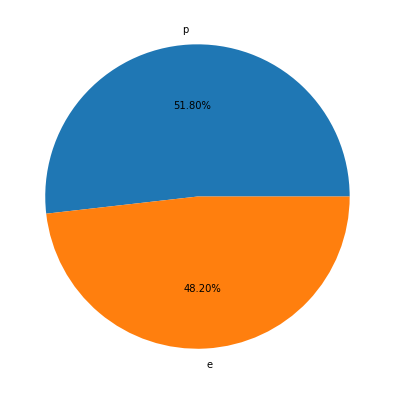

In [9]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df['class'].value_counts().to_list(), labels = list(df['class'].unique()),autopct='%1.2f%%')
plt.show()

##**Insights:**
  _As from the above visualization,_

*   **51.8%** of the observations belongs to the class of **Poisonous Mushrooms**.
*   **48.2%** of the observations belongs to the class of **Edible Mushrooms**.





##***Label Encoding***

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']:
    df[i] = labelencoder.fit_transform(df[i])

##***Feature Reduction***

######***In the dataset, we can see that, veil-type has only one unique value and hence won't contribute anything to the data. So we can safely remove it.***

In [11]:
df.drop(["veil-type"],axis=1, inplace=True)

##***Dataset after Pre-processing steps***

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [13]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
class,8124,2,e,4208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape,8124.0,NaN,NaN,NaN,3.348104,1.604329,0.0,2.0,3.0,5.0,5.0
cap-surface,8124.0,NaN,NaN,NaN,1.827671,1.229873,0.0,0.0,2.0,3.0,3.0
cap-color,8124.0,NaN,NaN,NaN,4.504677,2.545821,0.0,3.0,4.0,8.0,9.0
bruises,8124.0,NaN,NaN,NaN,0.415559,0.492848,0.0,0.0,0.0,1.0,1.0
odor,8124.0,NaN,NaN,NaN,4.144756,2.103729,0.0,2.0,5.0,5.0,8.0
gill-attachment,8124.0,NaN,NaN,NaN,0.974151,0.158695,0.0,1.0,1.0,1.0,1.0
gill-spacing,8124.0,NaN,NaN,NaN,0.161497,0.368011,0.0,0.0,0.0,0.0,1.0
gill-size,8124.0,NaN,NaN,NaN,0.309207,0.462195,0.0,0.0,0.0,1.0,1.0
gill-color,8124.0,NaN,NaN,NaN,4.810684,3.540359,0.0,2.0,5.0,7.0,11.0


##**3. Find out which classification model gives the best result to predict Mushroom Class.**

######***Defining the variable X and y***

In [14]:
X=df.drop(['class'], axis=1)
y=df['class']

######***Importing train_test_split from the sklearn.model_selection library and splitting the data, by keeping 75% of the data in train dataset and the rest 25% in test dataset***

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

##***Logistic Regression Model***
######***Training our model***

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

######***Making predictions based on our model***

In [17]:
predictions=logreg.predict(X_test)

######***Evaluating the accuracy of a model***

In [18]:
print('Accuracy of Logistic regression classifier on training set:', round(logreg.score(X_train, y_train),2))
print('Accuracy score of Logistic regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Logistic regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Logistic regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Logistic regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy score of Logistic regression classifier on test set: 0.95
Precision score of Logistic regression classifier on test set: 0.95
Recall score of Logistic regression classifier on test set: 0.95
F1 score of Logistic regression classifier on test set: 0.95


######***Confusion matrix of the model***

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


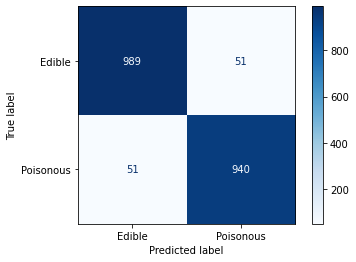

In [19]:
disp = ConfusionMatrixDisplay.from_estimator(
        logreg.fit(X_train, y_train),
        X_test,
        y_test,        
        display_labels=['Edible', 'Poisonous'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***K-Nearest Neighbors Model***
######***Training our model***

*   p = 2 , Euclidean Distance
*   n_neighbors = 5, the value of K neighbors
*   metric = 'minkowski'

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

######***Making predictions based on our model***

In [21]:
predictions=knn.predict(X_test)

######***Evaluating the accuracy of a model***

In [22]:
print('Accuracy of KNN regression classifier on training set:', round(knn.score(X_train, y_train),2))
print('Accuracy score of KNN regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of KNN regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of KNN regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of KNN regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of KNN regression classifier on training set: 1.0
Accuracy score of KNN regression classifier on test set: 1.0
Precision score of KNN regression classifier on test set: 1.0
Recall score of KNN regression classifier on test set: 1.0
F1 score of KNN regression classifier on test set: 1.0


######***Confusion matrix of the model***

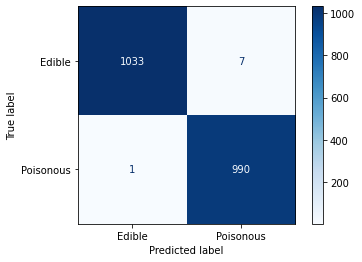

In [23]:
disp = ConfusionMatrixDisplay.from_estimator(
        knn.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Edible', 'Poisonous'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Support Vector Machine Model with Linear Kernel***
######***Training our model***

In [24]:
from sklearn.svm import SVC
svml = SVC(kernel='linear') 
svml.fit(X_train, y_train)

SVC(kernel='linear')

######***Making predictions based on our model***

In [25]:
predictions=svml.predict(X_test)

######***Evaluating the accuracy of a model***

In [26]:
print('Accuracy of Support Vector Machine with Linear Kernel regression classifier on training set:', round(svml.score(X_train, y_train),2))
print('Accuracy score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Support Vector Machine with Linear Kernel regression classifier on training set: 0.96
Accuracy score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.96
Precision score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.96
Recall score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.96
F1 score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.96


######***Confusion matrix of the model***

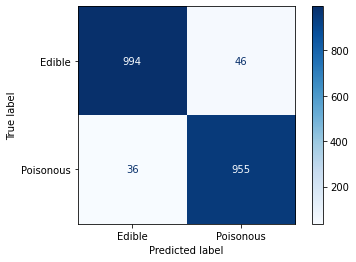

In [27]:
disp = ConfusionMatrixDisplay.from_estimator(
        svml.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Edible', 'Poisonous'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Support Vector Machine Model with Polynomial Kernel***
######***Training our model***

*   The degree of the polynomial, degree=8



In [28]:
from sklearn.svm import SVC
svmp = SVC(kernel='poly', degree=8)
svmp.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

######***Making predictions based on our model***

In [29]:
predictions=svmp.predict(X_test)

######***Evaluating the accuracy of a model***

In [30]:
print('Accuracy of Support Vector Machine with Polynomial Kernel regression classifier on training set:', round(svmp.score(X_train, y_train),2))
print('Accuracy score of Support Vector Machine with Polynomial Kernel regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Support Vector Machine with Polynomial Kernel regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Support Vector Machine with Polynomial Kernel regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Support Vector Machine with Polynomial Kernel regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Support Vector Machine with Polynomial Kernel regression classifier on training set: 1.0
Accuracy score of Support Vector Machine with Polynomial Kernel regression classifier on test set: 1.0
Precision score of Support Vector Machine with Polynomial Kernel regression classifier on test set: 1.0
Recall score of Support Vector Machine with Polynomial Kernel regression classifier on test set: 1.0
F1 score of Support Vector Machine with Polynomial Kernel regression classifier on test set: 1.0


######***Confusion matrix of the model***

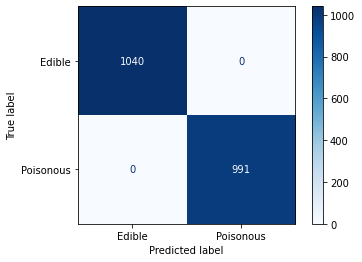

In [31]:
disp = ConfusionMatrixDisplay.from_estimator(
        svmp.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Edible', 'Poisonous'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Support Vector Machine Model with Gaussian Kernel***
######***Training our model***



In [32]:
from sklearn.svm import SVC
svmg = SVC(kernel='rbf')
svmg.fit(X_train, y_train)

SVC()

######***Making predictions based on our model***

In [33]:
predictions=svmg.predict(X_test)

######***Evaluating the accuracy of a model***

In [34]:
print('Accuracy of Support Vector Machine with Gaussian Kernel regression classifier on training set:', round(svmg.score(X_train, y_train),2))
print('Accuracy score of Support Vector Machine with Gaussian Kernel regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Support Vector Machine with Gaussian Kernel regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Support Vector Machine with Gaussian Kernel regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Support Vector Machine with Gaussian Kernel regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Support Vector Machine with Gaussian Kernel regression classifier on training set: 0.99
Accuracy score of Support Vector Machine with Gaussian Kernel regression classifier on test set: 0.99
Precision score of Support Vector Machine with Gaussian Kernel regression classifier on test set: 0.99
Recall score of Support Vector Machine with Gaussian Kernel regression classifier on test set: 0.99
F1 score of Support Vector Machine with Gaussian Kernel regression classifier on test set: 0.99


######***Confusion matrix of the model***

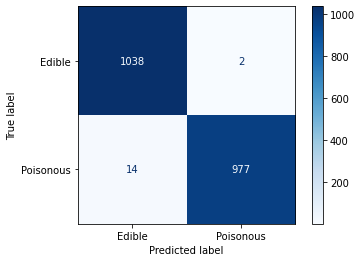

In [35]:
disp = ConfusionMatrixDisplay.from_estimator(
        svmg.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Edible', 'Poisonous'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Decision Tree Model***
######***Training our model***



In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

######***Making predictions based on our model***

In [37]:
predictions = dt.predict(X_test)

######***Evaluating the accuracy of a model***

In [38]:
print('Accuracy of Decision Tree regression classifier on training set:', round(dt.score(X_train, y_train),2))
print('Accuracy score of Decision Tree regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Decision Tree regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Decision Tree regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Decision Tree regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Decision Tree regression classifier on training set: 1.0
Accuracy score of Decision Tree regression classifier on test set: 1.0
Precision score of Decision Tree regression classifier on test set: 1.0
Recall score of Decision Tree regression classifier on test set: 1.0
F1 score of Decision Tree regression classifier on test set: 1.0


######***Confusion matrix of the model***

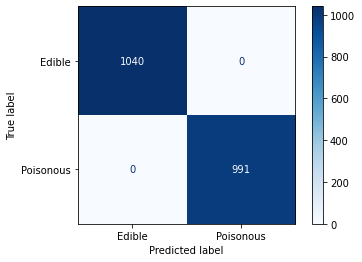

In [39]:
disp = ConfusionMatrixDisplay.from_estimator(
        dt.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Edible', 'Poisonous'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Random Forest Model***
######***Training our model***

*   The number of trees in the forest (n_estimators) = 100



In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

RandomForestClassifier()

######***Making predictions based on our model***

In [41]:
predictions = clf.predict(X_test)

######***Evaluating the accuracy of a model***

In [42]:
print('Accuracy of Random Forest regression classifier on training set:', round(clf.score(X_train, y_train),2))
print('Accuracy score of Random Forest regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Random Forest regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Random Forest regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Random Forest regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Random Forest regression classifier on training set: 1.0
Accuracy score of Random Forest regression classifier on test set: 1.0
Precision score of Random Forest regression classifier on test set: 1.0
Recall score of Random Forest regression classifier on test set: 1.0
F1 score of Random Forest regression classifier on test set: 1.0


######***Confusion matrix of the model***

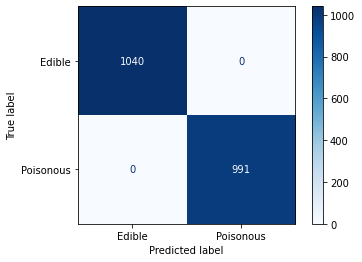

In [43]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Edible', 'Poisonous'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Gaussian Naive Bayes (GaussianNB) Model***
######***Training our model***

In [44]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian = gaussian.fit(X_train, y_train)

######***Making predictions based on our model***

In [45]:
predictions=gaussian.predict(X_test)

######***Evaluating the accuracy of a model***

In [46]:
print('Accuracy of Gaussian Naive Bayes classifier on training set:', round(gaussian.score(X_train, y_train),2))
print('Accuracy score of Gaussian Naive Bayes classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Gaussian Naive Bayes classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Gaussian Naive Bayes classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Gaussian Naive Bayes classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Gaussian Naive Bayes classifier on training set: 0.93
Accuracy score of Gaussian Naive Bayes classifier on test set: 0.93
Precision score of Gaussian Naive Bayes classifier on test set: 0.93
Recall score of Gaussian Naive Bayes classifier on test set: 0.93
F1 score of Gaussian Naive Bayes classifier on test set: 0.93


######***Confusion matrix of the model***

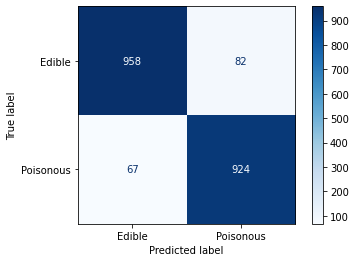

In [47]:
disp = ConfusionMatrixDisplay.from_estimator(
        gaussian.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Edible', 'Poisonous'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Multinomial Naive Bayes (MultinomialNB) Model***
######***Training our model***

In [48]:
from sklearn.naive_bayes import MultinomialNB
multi = MultinomialNB()
multi = multi.fit(X_train, y_train)

######***Making predictions based on our model***

In [49]:
predictions=multi.predict(X_test)

######***Evaluating the accuracy of a model***

In [50]:
print('Accuracy of Multinomial Naive Bayes classifier on training set:', round(multi.score(X_train, y_train),2))
print('Accuracy score of Multinomial Naive Bayes classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Multinomial Naive Bayes classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Multinomial Naive Bayes classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Multinomial Naive Bayes classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Multinomial Naive Bayes classifier on training set: 0.81
Accuracy score of Multinomial Naive Bayes classifier on test set: 0.81
Precision score of Multinomial Naive Bayes classifier on test set: 0.83
Recall score of Multinomial Naive Bayes classifier on test set: 0.81
F1 score of Multinomial Naive Bayes classifier on test set: 0.8


######***Confusion matrix of the model***

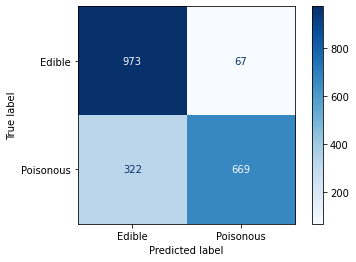

In [51]:
disp = ConfusionMatrixDisplay.from_estimator(
        multi.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Edible', 'Poisonous'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##***Bernoulli Naive Bayes (BernoulliNB) Model***
######***Training our model***

In [52]:
from sklearn.naive_bayes import BernoulliNB
berni = BernoulliNB()
berni = berni.fit(X_train, y_train)

######***Making predictions based on our model***

In [53]:
predictions=berni.predict(X_test)

######***Evaluating the accuracy of a model***

In [54]:
print('Accuracy of Bernoulli Naive Bayes classifier on training set:', round(berni.score(X_train, y_train),2))
print('Accuracy score of Bernoulli Naive Bayes classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Bernoulli Naive Bayes classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Bernoulli Naive Bayes classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Bernoulli Naive Bayes classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Bernoulli Naive Bayes classifier on training set: 0.85
Accuracy score of Bernoulli Naive Bayes classifier on test set: 0.84
Precision score of Bernoulli Naive Bayes classifier on test set: 0.86
Recall score of Bernoulli Naive Bayes classifier on test set: 0.84
F1 score of Bernoulli Naive Bayes classifier on test set: 0.84


######***Confusion matrix of the model***

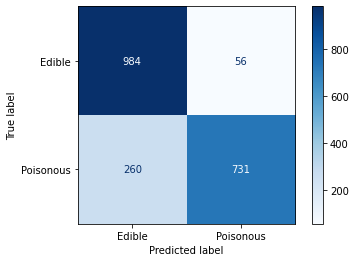

In [55]:
disp = ConfusionMatrixDisplay.from_estimator(
        berni.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Edible', 'Poisonous'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

##**Summary:**
Algorithm  | Accuracy on Training Set | Accuracy on Test Set | Precision Score | Recall Score | F1 Score
------------------------------------------|-------------------|-------------------|-------------------|-------------------|-------------------| 
Logistic Regression | 0.95 | 0.95 | 0.95 | 0.95 | 0.95 |
K-NN | 0.97 | 1.0 | 1.0 | 1.0 | 1.0 |
SVM-Linear | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 |
SVM-Polynomial | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
SVM-Gaussian | 0.99 | 0.99 | 0.99 | 0.99 | 0.99 |
Decision Tree | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
Random Forest | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
Gaussian Naive Bayes | 0.93 | 0.93 | 0.93 | 0.93 | 0.93 |
Multinomial Naive Bayes | 0.81 | 0.81 | 0.83 | 0.81 | 0.8 |
Bernoulli Naive Bayes | 0.85 | 0.84 | 0.86 | 0.84 | 0.84 |

##**Insights:**
_Among the 10 Classification algorithms we have performed, We can see that_ 

*   The classifier gives almost similar accuracy scores except Multinomial Naive Bayes and Bernoulli Naive Bayes.
*   But, the Accuracy on Test Set, Precision Score, Recall Score and F1 Score remained same for the classifiers - SVM Polynomial, Decision Tree, Random Forest.
*   Let us conclude that, among SVM Polynomial, Decision Tree, Random Forest - any these classifiers can be used for predicting the class of Mushroom



